# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4,sort_keys=True))
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["name"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
       
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": -43.0167,
        "lon": 147.3167
    },
    "dt": 1707244834,
    "id": 2175527,
    "main": {
        "feels_like": 51.4,
        "humidity": 80,
        "pressure": 1017,
        "temp": 52.68,
        "temp_max": 55.53,
        "temp_min": 52.52
    },
    "name": "Blackmans Bay",
    "sys": {
        "country": "AU",
        "id": 2011256,
        "sunrise": 1707247170,
        "sunset": 1707298209,
        "type": 2
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 248,
        "gust": 1.01,
        "speed": 1.01
    }
}
Processing Record 2 of Set 1 | kingston
{
    

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,55.53,80,94,1.01,Blackmans Bay,1707244834
1,kingston,17.9970,-76.7936,85.24,53,40,14.97,Kingston,1707244835
2,bilibino,68.0546,166.4372,-31.85,100,100,1.36,Bilibino,1707244835
3,heihe,50.2441,127.4902,-3.42,95,24,3.27,Heihe,1707244836
4,badger,64.8000,-147.5333,0.81,82,75,4.61,Badger,1707244836


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,55.53,80,94,1.01,Blackmans Bay,1707244834
1,kingston,17.9970,-76.7936,85.24,53,40,14.97,Kingston,1707244835
2,bilibino,68.0546,166.4372,-31.85,100,100,1.36,Bilibino,1707244835
3,heihe,50.2441,127.4902,-3.42,95,24,3.27,Heihe,1707244836
4,badger,64.8000,-147.5333,0.81,82,75,4.61,Badger,1707244836


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

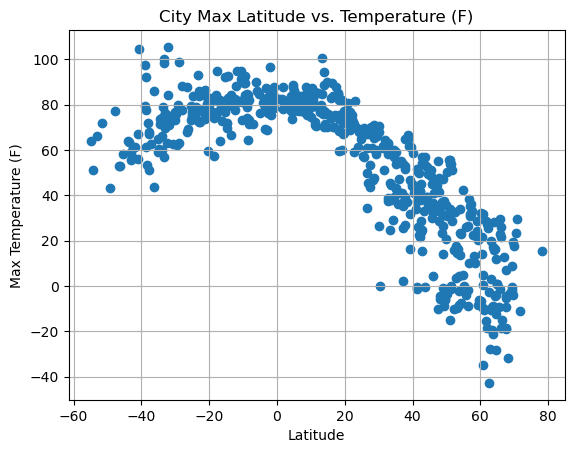

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

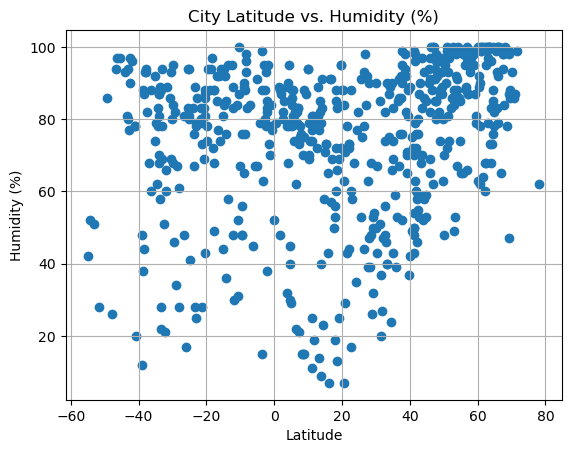

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

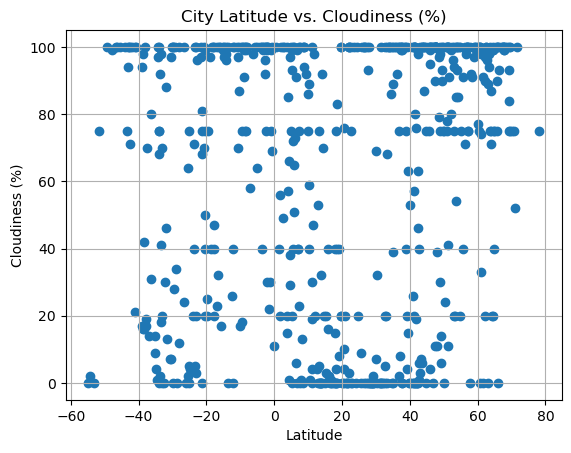

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

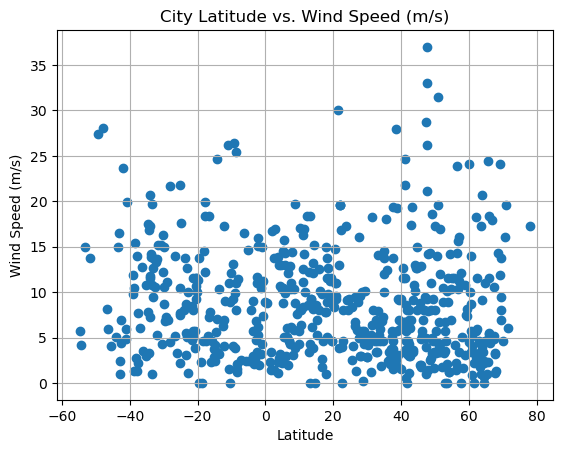

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots /// What would I keep here that I could replicate for each graph?
def lin_reg_plot(x,y, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")



In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]
# Display sample data
northern_hemi_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
577,khash,28.2211,61.2158,46.98,39,0,2.93,Khāsh,1707244995
578,kamennomostskiy,44.2983,40.1856,39.31,86,100,10.11,Kamennomostskiy,1707244996
579,galliano,29.4422,-90.2992,66.00,54,0,10.13,Galliano,1707244996
580,lagunillas,10.1301,-71.2595,86.22,69,89,8.08,Lagunillas,1707244996
581,kulp,38.4972,41.0122,37.00,98,100,2.57,Kulp,1707244996


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
555,puerto aysen,-45.4000,-72.7000,58.32,97,100,4.09,Puerto Aisén,1707244990
564,emerald,-23.5333,148.1667,78.35,76,71,5.46,Emerald,1707244992
567,isangel,-19.5500,169.2667,77.11,94,75,0.00,Isangel,1707244993
572,pontes e lacerda,-15.2261,-59.3353,91.99,44,100,2.82,Pontes e Lacerda,1707244994
576,vila velha,-20.3297,-40.2925,82.35,87,20,11.50,Vila Velha,1707244955


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7733405146134035


Text(0.5, 0, 'Latitude')

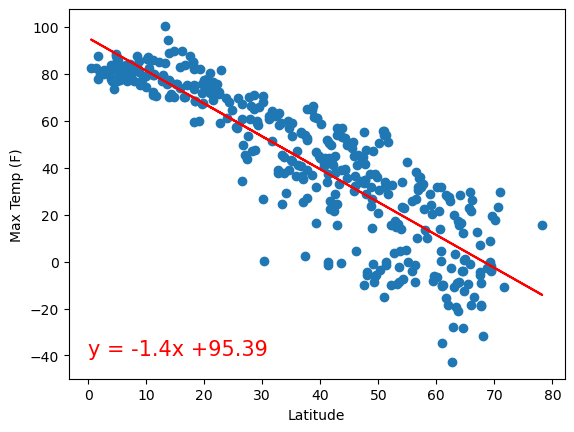

In [80]:
# Linear regression on Northern Hemisphere

lat = northern_hemi_df["Lat"]
temp = northern_hemi_df["Max Temp"]
coordinates = (0,-40)

lin_reg_plot(lat,temp, coordinates)

plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")


The r-value is: 0.23659149244708103


Text(0.5, 0, 'Latitude')

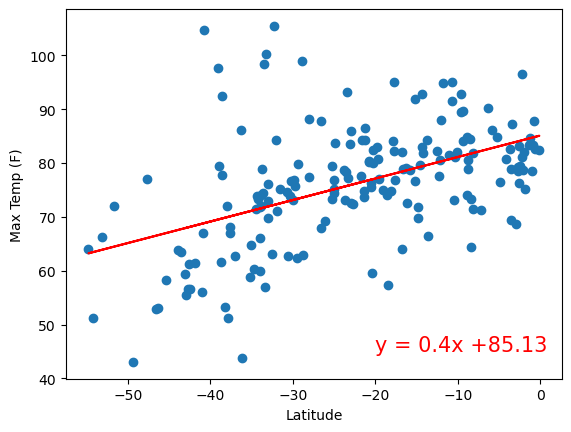

In [81]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df["Lat"]
temp = southern_hemi_df["Max Temp"]
coordinates = (-20,45)

lin_reg_plot(lat,temp, coordinates)

plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 

There is defintiely a relationship between Latitude and Temperature. Athough the relationship is stronger in the North versus the South, I'd argue that in both cases it is evident that it gets warmer as you approach the equator. Overall in the North it is a negative correlation whereas in the South it is a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15450179103201409


Text(0.5, 0, 'Latitude')

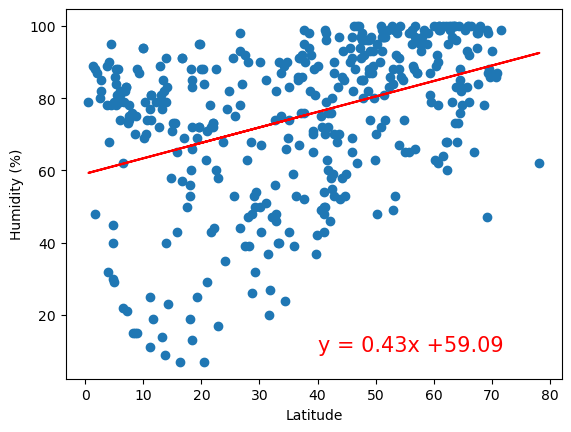

In [82]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
humid = northern_hemi_df["Humidity"]
coordinates = (40, 10)
lin_reg_plot(lat,humid, coordinates)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

The r-value is: 0.012779630035889767


Text(0.5, 0, 'Latitude')

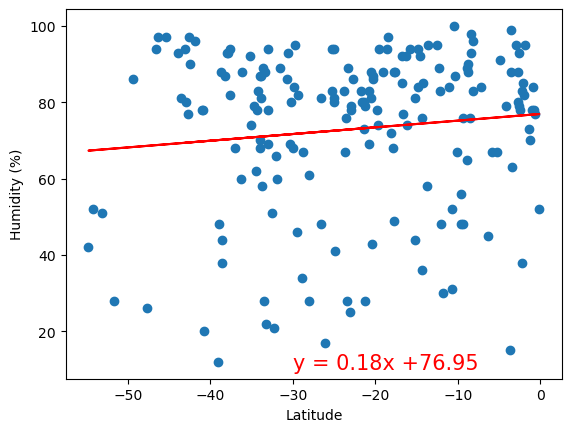

In [83]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
humid = southern_hemi_df["Humidity"]
coordinates = (-30, 10)

lin_reg_plot(lat,humid, coordinates)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 

Final thoughts on the Humidity & Latitude graphs leave us with a very weak relationship between the two across both hemispheres. Unable to come to any broader conclusions due to the small r-value found in the data. Latitudes across both hemispheres seems to have no correlation to humidity percentages.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11982365771082577


Text(0.5, 0, 'Latitude')

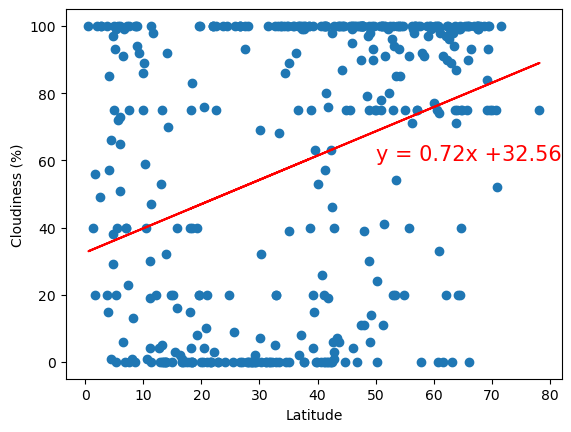

In [84]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
cloud = northern_hemi_df["Cloudiness"]
coordinates = (50, 60)

lin_reg_plot(lat,cloud, coordinates)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

The r-value is: 0.05344610612405324


Text(0.5, 0, 'Latitude')

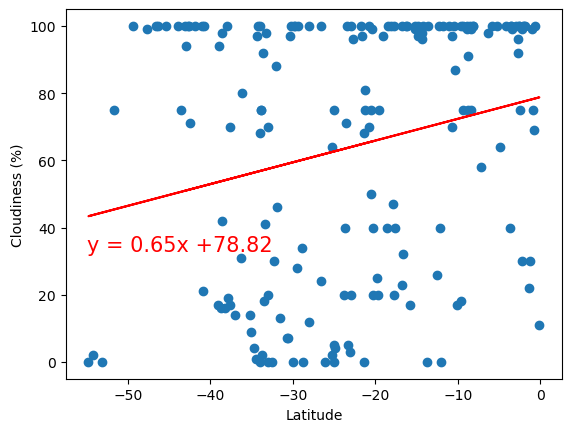

In [85]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
cloud = southern_hemi_df["Cloudiness"]
coordinates = (-55, 33)

lin_reg_plot(lat,cloud, coordinates)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 

Looking at the graphs for Cloudiness and Latitude, we are again unable to come to any broad conclusions due to the overall spread of the data. Weak relationships between these two variables across both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0008666505760835348


Text(0.5, 0, 'Latitude')

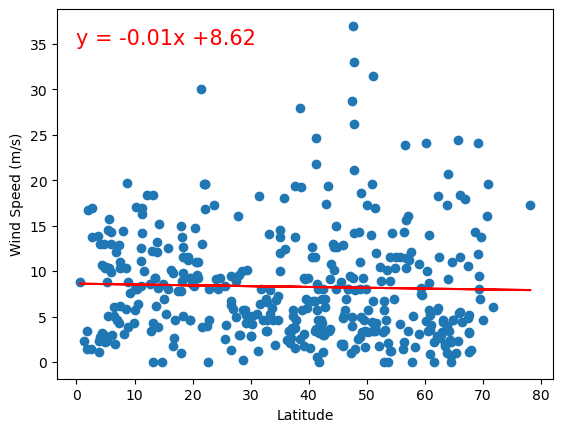

In [86]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
wind = northern_hemi_df["Wind Speed"]
coordinates = (0, 35)

lin_reg_plot(lat,wind, coordinates)

plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

The r-value is: 0.02456633235603206


Text(0.5, 0, 'Latitude')

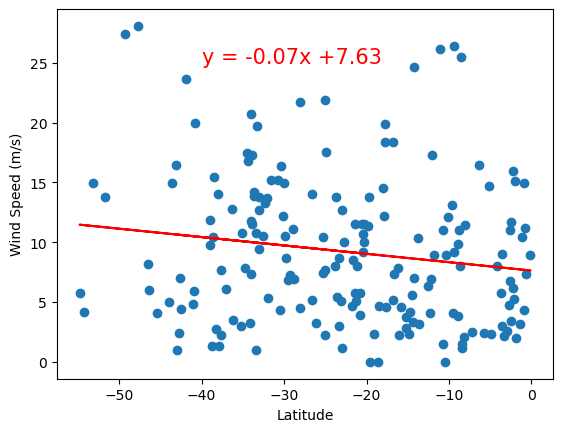

In [87]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
wind = southern_hemi_df["Wind Speed"]
coordinates = (-40, 25)

lin_reg_plot(lat,wind, coordinates)

plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 

No relationship between these two variables, wind speed and latitude. The spread of the data has returned poor r-values leading to no reliable correlation in either hemisphere.